In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import the trainingset
data = pd.read_csv('letter-recognition.csv',header=None)  
data.head(5)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [4]:
# data preprocessing for H, K
data = pd.read_csv('letter-recognition.csv',header=None) 
# pair H and K
data_H = data[data[0] == 'H']
data_K = data[data[0] == 'K']
data1 = pd.concat([data_H, data_K], axis=0)
data1.loc[data1[0] == 'H', 0] = 0
data1.loc[data1[0] == 'K', 0] = 1 


X_hk = data1[data1.columns[1:]]
X_hk.reset_index(drop=True, inplace=True)
y_hk = data1[0]
y_hk.reset_index(drop=True, inplace=True)
y_hk=y_hk.astype('int')

X_train_hk,X_test_hk, y_train_hk, y_test_hk = train_test_split(X_hk,y_hk,test_size=0.1, random_state=90)

max score：0.9735849056603774 number of subtree for max score：251


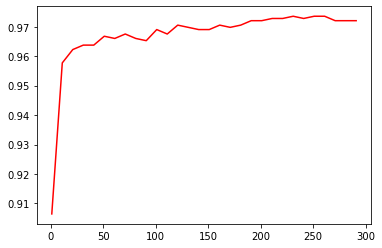

{'max_depth': 14} 0.9750943396226415
0.9195402298850576


In [5]:
# Model fitting for H,K classification 
score_lt = []

for i in range(0,300,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, X_train_hk, y_train_hk, cv=5).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('max score：{}'.format(score_max),
      'number of subtree for max score：{}'.format(score_lt.index(score_max)*10+1))

x = np.arange(1,301,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()

rfc = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90)

# Adjustment with grid search for max_depth
param_grid = {'max_depth':np.arange(1,20)}
GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(X_train_hk, y_train_hk)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

newRFC = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90, max_depth=best_param['max_depth'])


score = cross_val_score(newRFC, X_test_hk, y_test_hk, cv=5).mean()
print(score)  

max score：0.9018867924528303 number of subtree for max_score：181


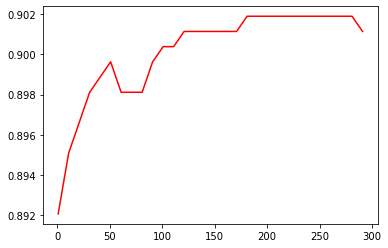

{'max_depth': 6} 0.909433962264151
0.8852873563218392


In [54]:
# Model fitting for H,K classification using Embedded Methods
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

RFC_ = RFC(random_state=90)

X_embedded_hk = SelectFromModel(RFC_, threshold = -np.inf, max_features = 4).fit_transform(X_hk, y_hk)
X_embedded_train_hk,X_embedded_test_hk, y_embedded_train_hk, y_embedded_test_hk = train_test_split(X_embedded_hk,y_hk,test_size=0.1,
                                                                                                   random_state=90)


score_lt = []


for i in range(0,300,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, X_embedded_train_hk, y_embedded_train_hk, cv=5).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('max score：{}'.format(score_max),
      'number of subtree for max_score：{}'.format(score_lt.index(score_max)*10+1))


x = np.arange(1,301,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()

rfc = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90)

# Adjustment with grid search for max_depth
param_grid = {'max_depth':np.arange(1,20)}
GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(X_embedded_train_hk, y_embedded_train_hk)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

newRFC = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90, max_depth=best_param['max_depth'])


score = cross_val_score(newRFC, X_embedded_test_hk, y_embedded_test_hk, cv=5).mean()
print(score)  


In [56]:
# data preprocessing for M, Y
data = pd.read_csv('letter-recognition.csv',header=None) 
# pair M and Y
data_M = data[data[0] == 'M']
data_Y = data[data[0] == 'Y']
data1 = pd.concat([data_M, data_Y], axis=0)
data1.loc[data1[0] == 'M', 0] = 0
data1.loc[data1[0] == 'Y', 0] = 1 


X_my = data1[data1.columns[1:]]
X_my.reset_index(drop=True, inplace=True)
y_my = data1[0]
y_my.reset_index(drop=True, inplace=True)
y_my=y_my.astype('int')

X_train_my,X_test_my, y_train_my, y_test_my = train_test_split(X_my,y_my,test_size=0.1, random_state=90)

max score：0.997887323943662 number of subtree for max_score：51


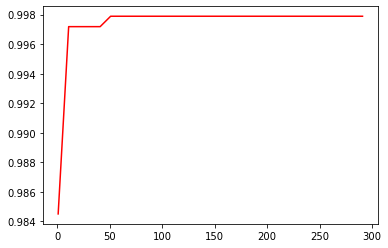

{'max_depth': 7} 0.997887323943662
0.9747983870967742


In [57]:
# Model fitting for M,Y classification
score_lt = []


for i in range(0,300,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, X_train_my, y_train_my, cv=5).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('max score：{}'.format(score_max),
      'number of subtree for max_score：{}'.format(score_lt.index(score_max)*10+1))


x = np.arange(1,301,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()

rfc = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90)

# Adjustment with grid search for max_depth
param_grid = {'max_depth':np.arange(1,20)}
GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(X_train_my, y_train_my)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)


newRFC = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90, max_depth=best_param['max_depth'])


score = cross_val_score(newRFC, X_test_my, y_test_my, cv=5).mean()
print(score)  

max score：0.9929577464788732 number of subtree for max_score：111


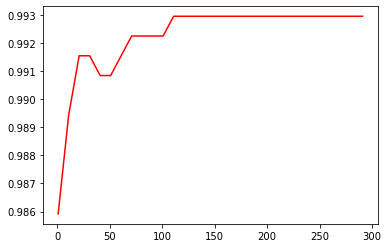

{'max_depth': 9} 0.9929577464788732
0.9618951612903226


In [58]:
# Model fitting for M,Y classification using Embedded Methods
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

RFC_ = RFC(random_state=90)

X_embedded_my = SelectFromModel(RFC_, threshold = -np.inf, max_features = 4).fit_transform(X_my, y_my)
X_embedded_train_my,X_embedded_test_my, y_embedded_train_my, y_embedded_test_my = train_test_split(X_embedded_my,y_my,test_size=0.1,
                                                                                                   random_state=90)


score_lt = []


for i in range(0,300,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, X_embedded_train_my, y_embedded_train_my, cv=5).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('max score：{}'.format(score_max),
      'number of subtree for max_score：{}'.format(score_lt.index(score_max)*10+1))


x = np.arange(1,301,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()

rfc = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90)

# Adjustment with grid search for max_depth
param_grid = {'max_depth':np.arange(1,20)}
GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(X_embedded_train_my, y_embedded_train_my)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

newRFC = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90, max_depth=best_param['max_depth'])


score = cross_val_score(newRFC, X_embedded_test_my, y_embedded_test_my, cv=5).mean()
print(score)  

In [59]:
# data preprocessing for E, F
data = pd.read_csv('letter-recognition.csv',header=None) 
# pair E and F
data_E = data[data[0] == 'E']
data_F = data[data[0] == 'F']
data1 = pd.concat([data_E, data_F], axis=0)
data1.loc[data1[0] == 'E', 0] = 0
data1.loc[data1[0] == 'F', 0] = 1 

X_ef = data1[data1.columns[1:]]
X_ef.reset_index(drop=True, inplace=True)
y_ef = data1[0]
y_ef.reset_index(drop=True, inplace=True)
y_ef=y_ef.astype('int')

X_train_ef,X_test_ef, y_train_ef, y_test_ef = train_test_split(X_ef,y_ef,test_size=0.1, random_state=90)

max point：0.9956782588369737 subtree number for max point：51


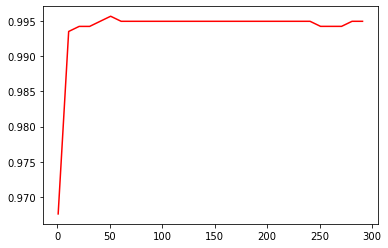

{'max_depth': 11} 0.9956782588369737
0.967741935483871


In [60]:
# Model fitting  for E,F classification 

score_lt = []

for i in range(0,300,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, X_train_ef, y_train_ef, cv=5).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('max point：{}'.format(score_max),
      'subtree number for max point：{}'.format(score_lt.index(score_max)*10+1))


x = np.arange(1,301,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()

rfc = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90)

# Adjustment with grid search for max_depth
param_grid = {'max_depth':np.arange(1,20)}
GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(X_train_ef, y_train_ef)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

newRFC = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90, max_depth= best_param['max_depth'])


score = cross_val_score(newRFC, X_test_ef, y_test_ef, cv=5).mean()
print(score)  

max score：0.979830143105732 number of subtree for max_score：71


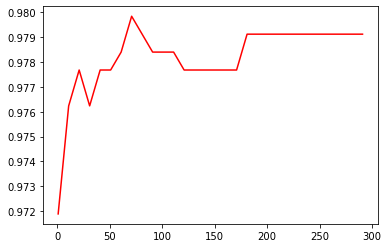

{'max_depth': 5} 0.9827104381476767
0.9548387096774194


In [64]:
# Model fitting for E,F classification using Embedded Methods
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

RFC_ = RFC(random_state=90)

X_embedded_ef = SelectFromModel(RFC_, threshold = -np.inf, max_features = 4).fit_transform(X_ef, y_ef)
X_embedded_train_ef,X_embedded_test_ef, y_embedded_train_ef, y_embedded_test_ef = train_test_split(X_embedded_ef,y_ef,test_size=0.1,
                                                                                                   random_state=90)


score_lt = []


for i in range(0,300,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, X_embedded_train_ef, y_embedded_train_ef, cv=5).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('max score：{}'.format(score_max),
      'number of subtree for max_score：{}'.format(score_lt.index(score_max)*10+1))


x = np.arange(1,301,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()

rfc = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90)

# Adjustment with grid search for max_depth
param_grid = {'max_depth':np.arange(1,20)}
GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(X_embedded_train_ef, y_embedded_train_ef)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

newRFC = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90, max_depth=best_param['max_depth'])


score = cross_val_score(newRFC, X_embedded_test_ef, y_embedded_test_ef, cv=5).mean()
print(score)  

In [65]:
#   data preprocessing for mulit
data = pd.read_csv('letter-recognition.csv',header=None) 
data
for i in range(20000):
    data.iloc[i, 0] = ord(data.iloc[i, 0]) - ord('A');
    
X_multi = data[data.columns[1:]]
X_multi.reset_index(drop=True, inplace=True)
y_multi = data[0]
y_multi.reset_index(drop=True, inplace=True)
y_multi =y_multi.astype('int')

X_train_multi,X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi,y_multi,test_size=0.1, random_state=90)

max point：0.9628888888888889 subtree number for max point：261


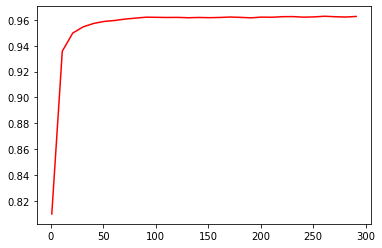

{'max_depth': 24} 0.9630555555555554
0.8515


In [67]:
# Model fitting for mulit-classification 

score_lt = []


for i in range(0,300,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, X_train_multi, y_train_multi, cv=5).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('max point：{}'.format(score_max),
      'subtree number for max point：{}'.format(score_lt.index(score_max)*10+1))

x = np.arange(1,301,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()

rfc = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90)

# Adjustment with grid search for max_depth
param_grid = {'max_depth':np.arange(1,40)}
GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(X_train_multi, y_train_multi)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

newRFC = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90, max_depth= best_param['max_depth'])


score = cross_val_score(newRFC, X_test_multi, y_test_multi, cv=5).mean()
print(score)  

max score：0.703111111111111 number of subtree for max_score：101


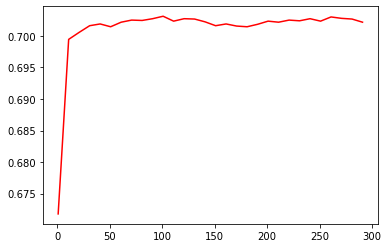

{'max_depth': 13} 0.709888888888889
0.6064999999999999


In [68]:
# Model fitting  for multi-classification using Embedded Methods
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

RFC_ = RFC(random_state=90)

X_embedded_multi = SelectFromModel(RFC_, threshold = -np.inf, max_features = 4).fit_transform(X_multi, y_multi)
X_embedded_train_multi,X_embedded_test_multi, y_embedded_train_multi, y_embedded_test_multi = train_test_split(X_embedded_multi,y_multi,
                                                                                                    test_size=0.1,random_state=90)


score_lt = []


for i in range(0,300,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, X_embedded_train_multi, y_embedded_train_multi, cv=5).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('max score：{}'.format(score_max),
      'number of subtree for max_score：{}'.format(score_lt.index(score_max)*10+1))


x = np.arange(1,301,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()

rfc = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90)

# Adjustment with grid search for max_depth
param_grid = {'max_depth':np.arange(1,20)}
GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(X_embedded_train_multi, y_embedded_train_multi)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

newRFC = RandomForestClassifier(n_estimators=score_lt.index(score_max)*10+1, random_state=90, max_depth=best_param['max_depth'])


score = cross_val_score(newRFC, X_embedded_test_multi, y_embedded_test_multi, cv=5).mean()
print(score)  